In [1]:
from covid_health.prep_ecdc import parse_covid_world_data
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = parse_covid_world_data()
print(df.shape)
df.head()

(9513, 7)


,time,active_cases,n_deceased,geo,geo_id,country_code,population
0,2020-04-08,30,4,Afghanistan,AF,AFG,37172386.0
1,2020-04-07,38,0,Afghanistan,AF,AFG,37172386.0
2,2020-04-06,29,2,Afghanistan,AF,AFG,37172386.0
3,2020-04-05,35,1,Afghanistan,AF,AFG,37172386.0
4,2020-04-04,0,0,Afghanistan,AF,AFG,37172386.0


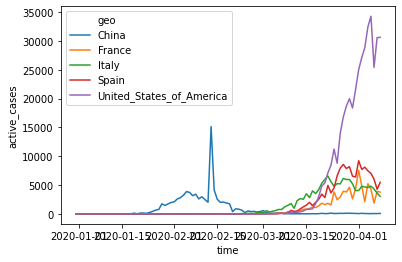

In [3]:
subset = df.loc[
    df.geo.isin(
        df.groupby("geo")
        .active_cases.max()
        .nlargest(5)
        .index
    )
]
sns.lineplot(data=subset, x="time", y="active_cases", hue="geo")